<a href="https://colab.research.google.com/github/JanLeyva/TFM/blob/main/HatefulMemev3_featuresExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.12


###  <font color='#A8EB15'> <b>  Interesting links </b>
- https://www.youtube.com/watch?v=igAF-48Pwnc&list=RDCMUCWXI5YeOsh03QvJ59PMaXFw&start_radio=1&rv=igAF-48Pwnc&t=475
- https://mmf.sh/docs/
- https://mmf.readthedocs.io/en/website/notes/hateful_memes_challenge.html
- https://github.com/facebookresearch/mmf/tree/main/projects/hateful_memes#prerequisites
- https://www.drivendata.co/blog/hateful-memes-benchmark/


## <font color='#A8EB15'> <b> Set up enviorament </b>

The `mmf` framework is more stable with python 3.7.11. For this reason we going to create conda enviorament with it.

In [1]:
#@title enviorament creation
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.11.0-Linux-x86_64.sh 
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.10.26=h06a4308_2
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.7.3=py37h27cfd23_1
    - conda==4.11.0=py37h06a4308_0
    - cryptography==36.0.0=py37h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1m=h7f8727e_0
    - pip==21.2.2=py37h06a4308_0
    - pycosat==0.6.3=py37h27cfd23_0
    - pycparser==2.21=pyhd3eb1b0_0
    - pyopenssl==21.0.0=py

--2022-03-16 19:17:27--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh [following]
--2022-03-16 19:17:27--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103730670 (99M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.11.0-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 50.7M 2s
    50K .......... .......... .......... 

In [2]:
!python --version # now returns Python 3.7.11 :: Anaconda, Inc.

Python 3.7.11


#### <font color='#A8EB15'> <b> GPU and Memory Check </b>

In [3]:
# Checking GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Mar 16 19:17:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Checking Memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


* Befor install mmf install specified versions of `torch` and `torchvision`

In [5]:
#@title install torch and torchvision
# Install specified versions of `torch` and `torchvision`, before installing mmf (causes an issue)
!pip install torch==1.6.0 torchvision==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 552.8 MB 4.5 kB/s 
     |████████████████████████████████| 5.8 MB 15.8 MB/s 
     |████████████████████████████████| 15.7 MB 9.7 MB/s 
     |████████████████████████████████| 829 kB 62.4 MB/s 
     |████████████████████████████████| 4.3 MB 68.0 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=d6574857a8d995be8fb61e9ec763a4dfb77a6260159cac8a109aee1b1147c3a0
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future


In [6]:
import os
home = "/content"
os.chdir(home)
os.getcwd()
!ls

Miniconda3-py37_4.11.0-Linux-x86_64.sh	sample_data


##  <font color='#A8EB15'> <b> MMF Configuration </b>


* <font color='#FFC300'> Restart RUNTIME at the end. </font>
*  <font color='#FFC300'> Remember to Mount Google Drive the first time. </font>

In [19]:
# @title bash mmf commands
%%bash
#mkdir mmf

# we gonna try with the mmf modify with the issues modify
cp -r drive/MyDrive/mmfv5.zip mmf

In [20]:
import os
os.chdir(os.path.join(home, "mmf"))

In [ ]:
!unzip mmfv5.zip

In [22]:
!ls mmf/projects/hateful_memes/configs/mmbt	  

defaults.yaml  with_features.yaml


In [23]:
# change the dir to mmf
# os.chdir("mmf")
!pip install --editable .

Obtaining file:///content/mmf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/PyTorchLightning/pytorch-lightning (to revision 86b177ebe) to /tmp/pip-install-wclm0c9l/pytorch-lightning_74e63d60e0b8436880a37e69fe2ba15d
  Running command git clone -q https://github.com/PyTorchLightning/pytorch-lightning /tmp/pip-install-wclm0c9l/pytorch-lightning_74e63d60e0b8436880a37e69fe2ba15d
  Running command git checkout -q 86b177ebe
  Resolved https://github.com/PyTorchLightning/pytorch-lightning to commit 86b177ebe
  Running command git submodule update --init --recursive -q
  From https://github.com/PyTorchLightning/lightning-tutorials
   * branch            290fb466de1fcc2ac6025f74b56906592911e856 -> FETCH_HEAD
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 69 kB 4.7 MB/s 
 

##  <font color='#A8EB15'> <b> UnZip dataset

In [59]:
import os
os.chdir("/content")

In [60]:
%%bash
cp drive/MyDrive/datasetZIP/hateful_memesv3.zip "/content"
mmf_convert_hm --zip_file="hateful_memesv3.zip" --password="pass" --bypass_checksum 1

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/pkg_resources/__init__.py", line 568, in _build_master
    ws.require(__requires__)
  File "/usr/local/lib/python3.7/site-packages/pkg_resources/__init__.py", line 886, in require
    needed = self.resolve(parse_requirements(requirements))
  File "/usr/local/lib/python3.7/site-packages/pkg_resources/__init__.py", line 777, in resolve
    raise VersionConflict(dist, req).with_context(dependent_req)
pkg_resources.ContextualVersionConflict: (numpy 1.21.5 (/usr/local/lib/python3.7/site-packages), Requirement.parse('numpy<=1.21.4,>=1.16.6'), {'mmf'})

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/mmf_convert_hm", line 33, in <module>
    sys.exit(load_entry_point('mmf', 'console_scripts', 'mmf_convert_hm')())
  File "/usr/local/bin/mmf_convert_hm", line 25, in importlib_load_entry_point
    return next(matches).load()
  File "/usr

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images    

dev_seen.jsonl	     img	  test_seen.jsonl
dev_unseen.jsonl     LICENSE.txt  test_unseen.jsonl
hateful_memesv3.zip  README.md	  train.jsonl


In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img/ | wc -l

12140


In [ ]:
# Free up the disk by removing .zip, .tar files
!rm -rf /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memesv3.zip
!rm -rf $home/hateful_memesv3.zip

## <font color='#A8EB15'> <b> Visualize

In [171]:
# !pip install --upgrade matplotlib

###  <font color='#A8EB15'> <b> Showing Some Memes

In [172]:
import os
import pandas as pd
from IPython.display import Image, display

path = "/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/"
text = "/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/train.jsonl"
imagesList=os.listdir(path)
trainText = pd.read_json(text, lines = True)


for i in range(4):
    display(Image(filename=os.path.join(path, trainText['img'][i])))
    print(trainText['text'][i])

FileNotFoundError: ignored

In [ ]:
import os
import pandas as pd
path = "/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img/"
text = "/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/train.jsonl"
imagesList=os.listdir(path)
textFeatures = pd.read_json(text, lines = True)

from IPython.display import Image, display

for i in range(4):
    display(Image(filename=os.path.join(path, imagesList[i])))
    print(textFeatures)

* Errores:
  - https://github.com/omry/omegaconf/issues/572 
  - https://github.com/omry/omegaconf/issues/573



##  <font color='#A8EB15'> <b> Conf before Train </b>

In [ ]:
!pip install future

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/

annotations  extras  extras.tar.gz  features  images


* Creamos el directorio `annotations`
* pasamos todo el directorio `images` to `annotations`



In [ ]:
!mkdir /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations

mkdir: cannot create directory ‘/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations’: File exists


In [ ]:
!cp  /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/*  /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations

cp: -r not specified; omitting directory '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img'


In [ ]:
!mkdir /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/img

In [ ]:
!cp  /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img/* /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/img

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/

dev_seen.jsonl	  img	       README.md	test_unseen.jsonl
dev_unseen.jsonl  LICENSE.txt  test_seen.jsonl	train.jsonl


In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/img | wc -l 

12140


In [ ]:
# !cp -R save/* drive/MyDrive/save_model2

In [ ]:
# we try to change the folder name

In [ ]:
# @title help function [ConfMatrix]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from sklearn import metrics


def plotHeatMap(X, classes, title=None, fmt='.2g', ax=None, xlabel=None, ylabel=None):
    """ Fix heatmap plot from Seaborn with pyplot 3.1.0, 3.1.1
        https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
    """
    ax = sns.heatmap(X, xticklabels=classes, yticklabels=classes, annot=True, \
                     fmt=fmt, cmap=plt.cm.Blues, ax=ax) #notation: "annot" not "annote"
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
        
def plotConfusionMatrix(yTrue, yEst, classes, title=None, fmt='.2g', ax=None):
    plotHeatMap(metrics.confusion_matrix(yTrue, yEst), classes, title, fmt, ax, xlabel='Estimations', \
                ylabel='True values'); 

## <font color='#A8EB15'> <b> Training mmbt model </b>


In [ ]:
!mmf_run config=projects/hateful_memes/configs/mmbt/defaults.yaml \
  model=mmbt \
  dataset=hateful_memes \
  training.log_interval=50 \
  training.max_updates=3000 \
  training.batch_size=16 \
  training.evaluation_interval=500

2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/mmbt/defaults.yaml
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option model to mmbt
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option training.log_interval to 50
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option training.max_updates to 3000
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option training.batch_size to 16
2022-03-08T19:43:01 | mmf.utils.configuration: Overriding option training.evaluation_interval to 500
2022-03-08T19:43:01 | mmf: Logging to: ./save/train.log
2022-03-08T19:43:01 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/mmbt/defaults.yaml', 'model=mmbt', 'dataset=hateful_memes', 'training.log_interval=50', 'training.max_updates=3000', 'training.batch_size=16'

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/mmbt/defaults.yaml \
    model=mmbt \
    dataset=hateful_memes \
    run_type=test \
    checkpoint.resume_file=save/current.ckpt

2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/mmbt/defaults.yaml
2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option model to mmbt
2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option run_type to test
2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/current.ckpt
2022-03-08T22:55:09 | mmf.utils.configuration: Overriding option evaluation.predict to true
2022-03-08T22:55:09 | mmf: Logging to: ./save/train.log
2022-03-08T22:55:09 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/mmbt/defaults.yaml', 'model=mmbt', 'dataset=hateful_memes', 'run_type=test', 'checkpoint.resume_file=save/current.ckpt', 'evaluation.predict=true'])
2022-03-08T22:55:09 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-03-08T22:55:09 | mmf.

* <font color='#A8EB15'> <b> Calculate metric AUROC </b>

In [ ]:
import pandas as pd

In [ ]:
!ls save/hateful_memes_mmbt_32673386//reports

hateful_memes_run_test_2022-03-08T21:57:09.csv


In [ ]:
pred = pd.read_csv("/content/save/hateful_memes_mmbt_9581149/reports/hateful_memes_run_test_2022-03-08T22:56:49.csv")

In [ ]:
pred

,id,proba,label
0,15740,0.016283,0
1,38794,0.971995,1
2,60792,0.014153,0
3,71824,0.001951,0
4,4796,0.740180,1
...,...,...,...
1995,71352,0.276205,0
1996,2164,0.005020,0
1997,3587,0.044384,0
1998,47839,0.056663,0


In [ ]:
test = pd.read_json("/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl", lines = True)

In [ ]:
test

,id,img,label,text
0,15740,img/15740.png,1,when someone tells you how to bbq
1,38794,img/38794.png,1,when they say white folks don't know how to cook
2,60792,img/60792.png,1,the original derp-face
3,71824,img/71824.png,1,okay here you go! you piece of shit!
4,4796,img/04796.png,1,xboxone farming 1619 simulator
...,...,...,...,...
1995,71352,img/71352.png,0,fighting for gay rights
1996,2164,img/02164.png,0,that feeling when you finish your homework in ...
1997,3587,img/03587.png,0,the day that shook new york city
1998,47839,img/47839.png,0,one of the first prototypes of the atom bomb


In [ ]:
ConfMatrix=metrics.confusion_matrix(test['label'], pred['label'])

In [ ]:
sum(pred['label'] == 1)

561

In [ ]:
ConfMatrix

array([[1005,  245],
       [ 434,  316]])

In [ ]:
ConfMatrix[1][1]

316

Accuracy: 0.6605


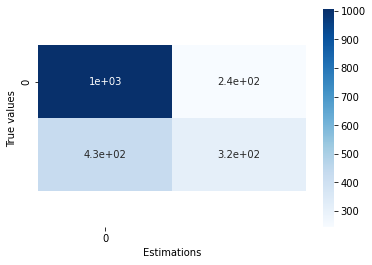

In [ ]:
# Confusion Martix
plotConfusionMatrix(test['label'], pred['label'], 2)
print("Accuracy:", (ConfMatrix[0][0]+ConfMatrix[1][1])/2000)

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/

dev_seen.jsonl	  img	       README.md	test_unseen.jsonl
dev_unseen.jsonl  LICENSE.txt  test_seen.jsonl	train.jsonl


# <font color='#A8EB15'> <b> VisualBERT </b>

In [ ]:
!mmf_run config=projects/hateful_memes/configs/visual_bert/direct.yaml \
  model=visual_bert \
  dataset=hateful_memes \
  training.log_interval=50 \
  training.max_updates=3000 \
  training.batch_size=16 \
  training.evaluation_interval=500

2022-03-10T14:37:11 | matplotlib.font_manager: Generating new fontManager, this may take some time...
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert/direct.yaml
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.log_interval to 50
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.max_updates to 3000
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.batch_size to 16
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.evaluation_interval to 500
2022-03-10T14:37:11 | mmf: Logging to: ./save/train.log
2022-03-10T14:37:11 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert/direct.yaml', '

In [ ]:
!mmf_run config=projects/visual_bert/configs/hateful_memes/from_coco.yaml \
    model=visual_bert \
    dataset=hateful_memes \
    run_type=train_val

2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option config to projects/visual_bert/configs/hateful_memes/from_coco.yaml
2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option run_type to train_val
2022-03-10T16:01:21 | mmf: Logging to: ./save/train.log
2022-03-10T16:01:21 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/visual_bert/configs/hateful_memes/from_coco.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'run_type=train_val'])
2022-03-10T16:01:21 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-03-10T16:01:21 | mmf.utils.general: CUDA Device 0 is: Tesla T4
2022-03-10T16:01:21 | mmf_cli.run: Using seed 21300645
2022-03-10T16:01:21 | mmf.trainers.mmf_trainer: Loading datasets
loading configuration file https://huggingface.co/bert-base-uncased/re

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/visual_bert//direct.yaml \
    model=visual_bert \
    dataset=hateful_memes \
    run_type=test \
    checkpoint.resume_file=save/best.ckpt

2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert//direct.yaml
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option run_type to test
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/best.ckpt
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option evaluation.predict to true
2022-03-10T15:53:08 | mmf: Logging to: ./save/train.log
2022-03-10T15:53:08 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert//direct.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'run_type=test', 'checkpoint.resume_file=save/best.ckpt', 'evaluation.predict=true'])
2022-03-10T15:53:08 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-0

* Copy the model to Drive

In [ ]:
!ls drive/MyDrive/

'Colab Notebooks'	    mmfv3.zip	    'saveVisualBERT (1)'
 CV_Jan_Leyva.pdf	    mmfv5.zip	     SL_Test
 datasetZIP		    Pythonfiles      STATICAL_LEARNING
'EIO - UPC'		    save_model	     TFMdataset
 Final_Assignment_MVA.zip   save_model2
'MESIO - UPC'		    saveVisualBERT


In [ ]:
!cp -r save drive/MyDrive/saveVisualBERT

In [ ]:
import pandas as pd
pred = pd.read_csv("/content/save/hateful_memes_visual_bert_8294730/reports/hateful_memes_run_test_2022-03-10T15:54:05.csv")
test = pd.read_json("/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl", lines = True)

Accuracy: 0.688


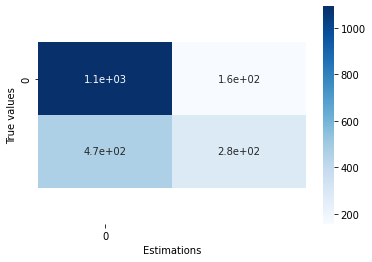

In [ ]:
# Confusion Martix
plotConfusionMatrix(test['label'], pred['label'], 2)
ConfMatrix=metrics.confusion_matrix(test['label'], pred['label'])
print("Accuracy:", (ConfMatrix[0][0]+ConfMatrix[1][1])/2000)

In [ ]:
!cp /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl drive/MyDrive

#<font color='#A8EB15'> <b> VilBERT </b>

In [ ]:
!mmf_run config=projects/hateful_memes/configs/vilbert/defaults.yaml \
  model=vilbert \
  dataset=hateful_memes \
  training.log_interval=50 \
  training.max_updates=3000 \
  training.batch_size=16 \
  training.evaluation_interval=500

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/pkg_resources/__init__.py", line 3016, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/site-packages/pkg_resources/__init__.py", line 2813, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/pkg_resources/__init__.py", line 3007, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.7/site-packages/pkg_resources/__init__.py", line 2813, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/mmf_run", line 33, in <module>
    sys.exit(load_entry_point('mmf', 'console_scripts', 'mmf_run')())
  File "/usr/local/bin/mmf_run", line 

* <font color='#A8EB15'> Validation set

In [ ]:
!mmf_run config=projects/hateful_memes/configs/vilbert/defaults.yaml \
    model=vilbert \
    dataset=hateful_memes \
    run_type=train_val

Traceback (most recent call last):
  File "/usr/local/bin/mmf_run", line 33, in <module>
    sys.exit(load_entry_point('mmf', 'console_scripts', 'mmf_run')())
  File "/content/mmf/mmf_cli/run.py", line 91, in run
    configuration = Configuration(args)
  File "/content/mmf/mmf/utils/configuration.py", line 341, in __init__
    self.config = OmegaConf.merge(self._default_config, other_configs)
  File "/usr/local/lib/python3.7/site-packages/omegaconf/omegaconf.py", line 264, in merge
  File "/usr/local/lib/python3.7/site-packages/omegaconf/basecontainer.py", line 436, in merge_with
    self._merge_with(*others)
  File "/usr/local/lib/python3.7/site-packages/omegaconf/basecontainer.py", line 460, in _merge_with
    BaseContainer._map_merge(self, other)
  File "/usr/local/lib/python3.7/site-packages/omegaconf/basecontainer.py", line 341, in _map_merge
    if isinstance(dest_node, BaseContainer):
  File "/usr/local/lib/python3.7/abc.py", line 139, in __instancecheck__
    return _abc_instan

* <font color='#A8EB15'> Predictions in test set

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/vilbert/defaults.yaml \
    model=vilbert \
    dataset=hateful_memes \
    run_type=test \
    checkpoint.resume_file=save/best.ckpt

* <font color='#A8EB15'> Confusion Matrix

In [ ]:
import pandas as pd
pred = pd.read_csv("/content/save/hateful_memes_vilbert_48408345/reports/hateful_memes_run_test_2022-03-11T17:00:38.csv")
test = pd.read_json("/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl", lines = True)

In [ ]:
# Confusion Martix
plotConfusionMatrix(test['label'], pred['label'], 2)
ConfMatrix=metrics.confusion_matrix(test['label'], pred['label'])
print("Accuracy:", (ConfMatrix[0][0]+ConfMatrix[1][1])/2000)

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test['label'], pred['proba'],  pos_label=1)
metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(figsize=(6, 6), dpi=80)
plt.plot(fpr, tpr)

* save the model

In [ ]:
!ls

In [ ]:
!mkdir drive/MyDrive/ViLbert

In [ ]:
!cp -r save/* drive/MyDrive/ViLbert

# <font color='#A8EB15'> <b> VisualBERT COCO </b>

In [ ]:
!mmf_run config=projects/hateful_memes/configs/visual_bert/from_coco.yaml \
  model=visual_bert \
  dataset=hateful_memes \
  training.log_interval=50 \
  training.max_updates=3000 \
  training.batch_size=16 \
  training.evaluation_interval=500

2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert/from_coco.yaml
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option training.log_interval to 50
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option training.max_updates to 3000
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option training.batch_size to 16
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option training.evaluation_interval to 500
2022-03-13T14:04:16 | mmf: Logging to: ./save/train.log
2022-03-13T14:04:16 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert/from_coco.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'training.log_interval=50', 'training.max_updates=3

* <font color='#A8EB15'> <b> Evaluation on Validation set </b>

In [ ]:
!mmf_run config=projects/hateful_memes/configs/visual_bert/from_coco.yaml \
              model=visual_bert \
              dataset=hateful_memes \
              run_type=val \
              checkpoint.resume_file=save/best.ckpt \
              checkpoint.resume_pretrained=False

2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert/from_coco.yaml
2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option run_type to val
2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/best.ckpt
2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option checkpoint.resume_pretrained to False
2022-03-13T14:49:19 | mmf: Logging to: ./save/train.log
2022-03-13T14:49:19 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert/from_coco.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'run_type=val', 'checkpoint.resume_file=save/best.ckpt', 'checkpoint.resume_pretrained=False'])
2022-03-13T14:49:19 | mmf_cli.run: Torch ver

* <font color='#A8EB15'> <b> Predict on Test set

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/visual_bert/from_coco.yaml \
              model=visual_bert \
              dataset=hateful_memes \
              run_type=test \
              checkpoint.resume_file=save/best.ckpt

2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert/from_coco.yaml
2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option run_type to test
2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/best.ckpt
2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option evaluation.predict to true
2022-03-13T15:02:10 | mmf: Logging to: ./save/train.log
2022-03-13T15:02:10 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert/from_coco.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'run_type=test', 'checkpoint.resume_file=save/best.ckpt', 'evaluation.predict=true'])
2022-03-13T15:02:10 | mmf_cli.run: Torch version: 1.9.0+cu102
20

In [ ]:
import pandas as pd
pred = pd.read_csv("/content/save/hateful_memes_visual_bert_10792640/reports/hateful_memes_run_test_2022-03-13T15:02:46.csv")
test = pd.read_json("/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl", lines = True)

In [ ]:
sum(pred['label'] == test['label'])

837

Accuracy: 0.6335


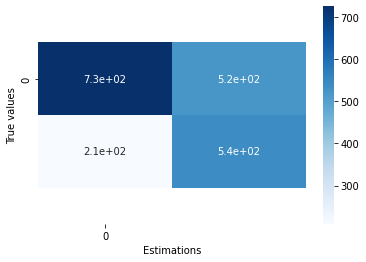

In [ ]:
# Confusion Martix
plotConfusionMatrix(test['label'], pred['label'], 2)
ConfMatrix=metrics.confusion_matrix(test['label'], pred['label'])
print("Accuracy:", (ConfMatrix[0][0]+ConfMatrix[1][1])/2000)

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test['label'], pred['proba'],  pos_label=1)
metrics.auc(fpr, tpr)

0.6992773333333333

drive  Miniconda3-py37_4.11.0-Linux-x86_64.sh  mmf  sample_data  save


In [ ]:
!cp -r save/* drive/MyDrive/VisBERTCOCO

In [ ]:
!mkdir drive/MyDrive/VisBERTCOCO

# <font color='#A8EB15'> <b> Summary Models - Baseline</b> </font>

|Model| Acc. Val   | AuROC Val  | Acc. Test  |  AuROC Test |
|--        -|-    --|-     --|--     -|--     -|
| mmbt      | 63.33  | 62.83  | 66.05  | 67.15 |
| VisualBERT| 68.15  | 67.36  | 68.80  | 72.57 |
| VilBERT   | 68.15  | 68.93  | 69.15  | 71.46 |
| VisualBERT COCO| 69.63 | 72.44 | 70.70 | 76.09|

# <font color='#A8EB15'> <b> Feature extraction </b>
## <font color='#A8EB15'> <b> FairFace </b>

Repo [link](https://github.com/dchen236/FairFace)

### <font color='#A8EB15'> Configuration FairFace

In [ ]:
# install needed packeges
!conda install -c conda-forge dlib t

In [28]:
os.chdir("/content")

In [36]:
os.chdir("FairFace")

In [33]:
!git clone https://github.com/dchen236/FairFace.git

Cloning into 'FairFace'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 220 (delta 4), reused 0 (delta 0), pack-reused 211
Receiving objects: 100% (220/220), 14.23 MiB | 26.50 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [46]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kXdAsqT8YiNYIMm8p5vQUvNFwhBbT4vQ-jxEZdBQ5J4X' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kXdAsqT8YiNYIMm8p5vQUvNFwhBbT4vQ" -O multi_4.pt && rm -rf /tmp/cookies.txt

--2022-03-16 20:11:02--  https://docs.google.com/uc?export=download&confirm=&id=1kXdAsqT8YiNYIMm8p5vQUvNFwhBbT4vQ
Resolving docs.google.com (docs.google.com)... 173.194.202.113, 173.194.202.100, 173.194.202.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jovcoj5uoe855jogalboina8onr44u9s/1647461400000/15656402004234789839/*/1kXdAsqT8YiNYIMm8p5vQUvNFwhBbT4vQ?e=download [following]
--2022-03-16 20:11:04--  https://doc-0g-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jovcoj5uoe855jogalboina8onr44u9s/1647461400000/15656402004234789839/*/1kXdAsqT8YiNYIMm8p5vQUvNFwhBbT4vQ?e=download
Resolving doc-0g-7c-docs.googleusercontent.com (doc-0g-7c-docs.googleusercontent.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to doc-0g-7c-docs.googleusercontent.com (doc-0

In [48]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=113QMzQzkBDmYMs9LwzvD-jxEZdBQ5J4X' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=113QMzQzkBDmYMs9LwzvD-jxEZdBQ5J4X" -O multi_7.pt && rm -rf /tmp/cookies.txt

--2022-03-16 20:12:27--  https://docs.google.com/uc?export=download&confirm=&id=113QMzQzkBDmYMs9LwzvD-jxEZdBQ5J4X
Resolving docs.google.com (docs.google.com)... 74.125.195.102, 74.125.195.138, 74.125.195.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kutt131eoajjml737vun9spdc8avvbb6/1647461475000/15656402004234789839/*/113QMzQzkBDmYMs9LwzvD-jxEZdBQ5J4X?e=download [following]
--2022-03-16 20:12:28--  https://doc-08-7c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kutt131eoajjml737vun9spdc8avvbb6/1647461475000/15656402004234789839/*/113QMzQzkBDmYMs9LwzvD-jxEZdBQ5J4X?e=download
Resolving doc-08-7c-docs.googleusercontent.com (doc-08-7c-docs.googleusercontent.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to doc-08-7c-docs.googleusercontent.com (doc-08-7c

In [58]:
!ls

 1F_pXfbzWvG-bhCpNsRj6F_xsdjpesiFu   multi_4.pt        test
 detected_faces			     multi_7.pt        test_imgs.csv
 dlib_models			     predict_bbox.py   test_outputs.csv
 examples			     predict.py       'view?usp=sharing'
 FILENAME			     ReadMe
 FILENAME2			     README.md


In [57]:
os.chdir("/content/FairFace/FairFace")

#### Create the csv file in the propertly format

In [ ]:
!unzip -P "pass" hateful_memesv3.zip

In [69]:
!ls

dev_seen.jsonl	     img				     sample_data
dev_unseen.jsonl     LICENSE.txt			     test_seen.jsonl
drive		     Miniconda3-py37_4.11.0-Linux-x86_64.sh  test_unseen.jsonl
FairFace	     mmf				     train.jsonl
hateful_memesv3.zip  README.md


In [70]:
import pandas as pd
path = "img"
text = "train.jsonl"
imagesList=os.listdir(path)
trainText = pd.read_json(text, lines = True)

In [157]:
trainText['img']

0       img/42953.png
1       img/23058.png
2       img/13894.png
3       img/37408.png
4       img/82403.png
            ...      
8495    img/10423.png
8496    img/98203.png
8497    img/36947.png
8498    img/16492.png
8499    img/15937.png
Name: img, Length: 8500, dtype: object

In [163]:
csvImages.at[1,'img']

'img/23058.png'

In [167]:
csvImages = pd.DataFrame(trainText['img'])

csvImg = []
for i in range(10):
  csvImg.append(os.path.join("/content",csvImages.at[i,'img']))

csvImg = pd.DataFrame(csvImg).rename(columns={0: "img_path"})
csvImg.to_csv("csvImg.csv",index=False)

In [144]:
os.chdir("/content")

In [169]:
!ls

 1F_pXfbzWvG-bhCpNsRj6F_xsdjpesiFu   FILENAME2	       README.md
 csvImg.csv			     multi_4.pt        test
 detected_faces			     multi_7.pt        test_imgs.csv
 dlib_models			     predict_bbox.py   test_outputs.csv
 examples			     predict.py       'view?usp=sharing'
 FILENAME			     ReadMe


In [150]:
os.chdir("/content/FairFace/FairFace")

In [170]:
!python3 predict.py --csv "csvImg.csv"

using CUDA?: True
---0/10---
tcmalloc: large alloc 1389535232 bytes == 0x55f7034a0000 @  0x7fc218c89887 0x7fc1a9144a68 0x7fc1a914b8d6 0x7fc1a914c2cf 0x7fc1a909d9fc 0x7fc1a90b7abb 0x7fc1a909b3b8 0x7fc1a89bd46d 0x55f6ec4f871c 0x55f6ec4c8f5e 0x55f6ec4de041 0x55f6ec4c97b6 0x55f6ec5367d6 0x55f6ec52e88c 0x55f6ec576545 0x55f6ec4c7bb3 0x55f6ec4e81c1 0x55f6ec572155 0x55f6ec4c7bb3 0x55f6ec4c8ee3 0x55f6ec5d6802 0x55f6ec5e094e 0x55f6ec5e0b3b 0x55f6ec5e1c3a 0x55f6ec5e1ccc 0x7fc217ec0c87 0x55f6ec586555
tcmalloc: large alloc 1408434176 bytes == 0x55f70e1c6000 @  0x7fc218c89887 0x7fc1a9144a68 0x7fc1a914b8d6 0x7fc1a914c2cf 0x7fc1a909d9fc 0x7fc1a90b7abb 0x7fc1a909b3b8 0x7fc1a89bd46d 0x55f6ec4f871c 0x55f6ec4c8f5e 0x55f6ec4de041 0x55f6ec4c97b6 0x55f6ec5367d6 0x55f6ec52e88c 0x55f6ec576545 0x55f6ec4c7bb3 0x55f6ec4e81c1 0x55f6ec572155 0x55f6ec4c7bb3 0x55f6ec4c8ee3 0x55f6ec5d6802 0x55f6ec5e094e 0x55f6ec5e0b3b 0x55f6ec5e1c3a 0x55f6ec5e1ccc 0x7fc217ec0c87 0x55f6ec586555
tcmalloc: large alloc 1463222272 bytes ==

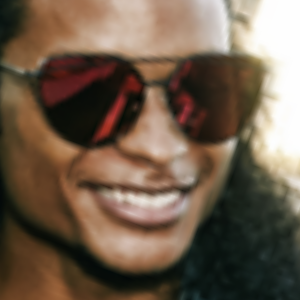

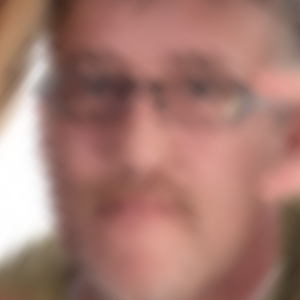

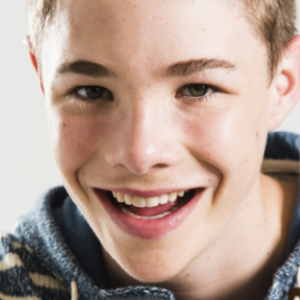

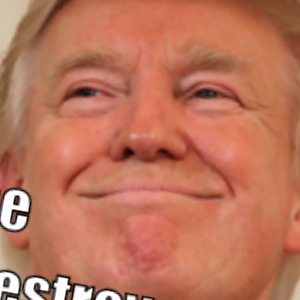

In [175]:
# visualize face detected
import os
import pandas as pd
from IPython.display import Image, display

path = "/content/FairFace/FairFace/detected_faces"
imagesList=os.listdir(path)


for i in range(4):
    display(Image(filename=os.path.join(path, imagesList[i])))

In [ ]:
outputFairFace = pd.read_csv("/Content/FairFace/FairFace/test_outputs.csv")
outputFairFace